<a href="https://colab.research.google.com/github/NamraKhatoon/profesonal-port/blob/main/RNN_Implemation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MNIST Dataset**

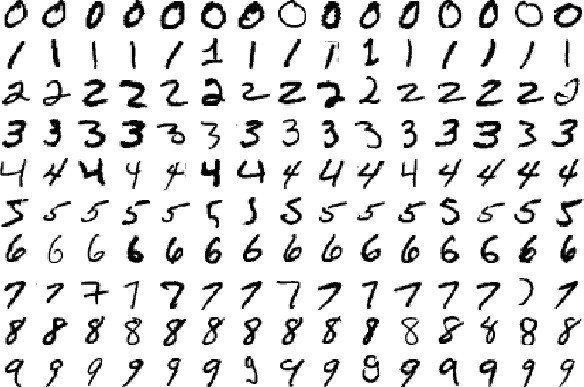

In [ ]:
#Import Libaries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#Loading the Data
mnist = tf.keras.datasets.mnist  
(x_train, y_train),(x_test, y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test

x_train = x_train/255.0
x_test = x_test/255.0

print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)

shape of x_train:  (60000, 28, 28)
shape of x_test:  (10000, 28, 28)


In [ ]:
#Building  Model
model = Sequential()
model.add(LSTM(128, input_shape=(x_train.shape[1:]), activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))


In [ ]:
#Model Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 28, 128)           80384     
                                                                 
 dropout_3 (Dropout)         (None, 28, 128)           0         
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 10)               

In [ ]:
#Training model
opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'],
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
r=model.fit(x_train,
          y_train,
          epochs=3,
          validation_data=(x_test, y_test))

Epoch 1/3
1875/1875 [==============================] - 119s 61ms/step - loss: 0.6151 - accuracy: 0.8030 - val_loss: 0.1479 - val_accuracy: 0.9555
Epoch 2/3
1875/1875 [==============================] - 111s 59ms/step - loss: 0.1487 - accuracy: 0.9591 - val_loss: 0.0849 - val_accuracy: 0.9735
Epoch 3/3
1875/1875 [==============================] - 112s 60ms/step - loss: 0.1205 - accuracy: 0.9688 - val_loss: 0.0814 - val_accuracy: 0.9758


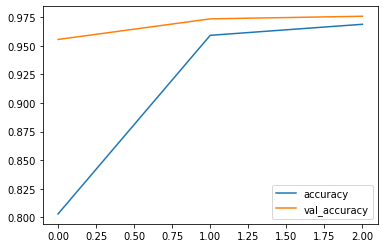

In [ ]:
#Accuracy Graph
plt.plot(r.history['accuracy'], label= 'accuracy')
plt.plot(r.history['val_accuracy'], label= 'val_accuracy')
plt.legend()

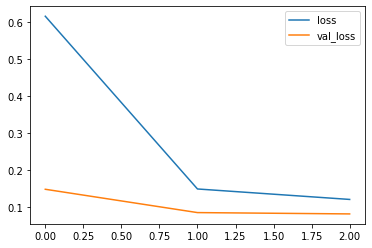

In [ ]:
#loss Graph
plt.plot(r.history['loss'], label= 'loss')
plt.plot(r.history['val_loss'], label= 'val_loss')
plt.legend()

In [ ]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 8s 25ms/step - loss: 0.0814 - accuracy: 0.9758
[0.08136210590600967, 0.9757999777793884]


Confusion matrix without normalization
[[ 966    0    1    0    2    0    4    1    6    0]
 [   0 1129    1    1    0    0    2    0    2    0]
 [   1    9 1012    4    0    0    3    1    2    0]
 [   0    1    5  990    0    9    0    3    2    0]
 [   0    1    0    1  970    0    5    0    0    5]
 [   2    1    3    2    1  879    2    0    1    1]
 [   0    3    0    0    0    1  952    0    2    0]
 [   0   31    6    0    5    0    0  978    1    7]
 [   4    0    4    1    2    5    9    1  943    5]
 [   1    6    0    0   48    6    1    0    8  939]]


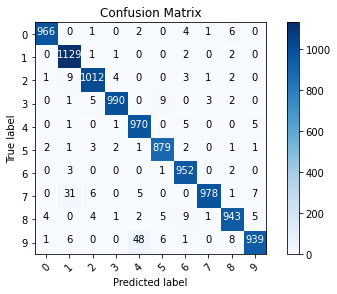

In [ ]:
#Confusion Matrix


from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title="Confusion Matrix",
                          cmap = plt.cm.Blues):
  
  """
  This function prints and plots the confusion matrix.
  Normalize can be applied by setting 'normalize = True'
  """
  
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    print("Normalized Confusion Matrix")
  
  else:
    print("Confusion matrix without normalization")
  
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment = 'center',
             color = "white" if cm[i, j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


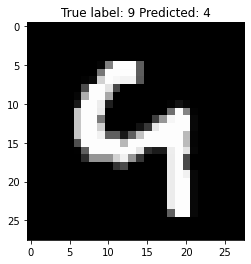

In [ ]:
#Model went wrong
array = np.where(p_test != y_test)[0]
i = np.random.choice(array)
plt.imshow(x_test[i], cmap= 'gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));